<a href="https://colab.research.google.com/github/fire-long/24-1AI-ML/blob/main/W10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6 결정트리
## 6.1 결정트리 학습과 시각화

In [9]:
import sys

#노트북이 코랩에서 실행중인지 체크
if 'google.colab' in sys.modules:
  !echo 'debconf debconf/fronted select Noninteractive'|debconf-set-selections
  #나눔 폰트 설치
  !sudo apt-get -qq -y install fonts-nanum
  import matplotlib.font_manager as fm
  font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
  for fpath in font_files:
    fm.fontManager.addfont(fpath)
  #나눔바른곧기 폰트로 설정
  import matplotlib.pyplot as plt
  plt.rc('font', family='NanumBarunGothic')
  #마이너스 기호 표시 오류 수정
  import matplotlib
  matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font',family='NanumBarunGothic')

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris(as_frame = True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file = "iris_tree.dot",
    feature_names = ["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)
from graphviz import Source
Source.from_file("./iris_tree.dot")
#png 저장
!dot -Tpng "iris_tree.dot" -o "iris_tree.png"

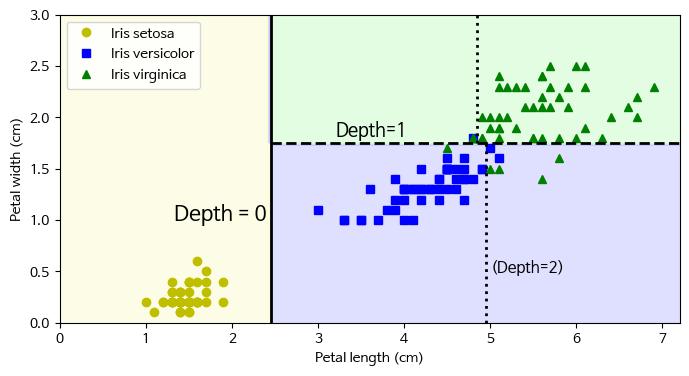

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ['yo', 'bs', 'g^'])):
    plt.plot(X_iris[:, 0][y_iris==idx], X_iris[:, 1][y_iris==idx], style, label=f"Iris {name}")

tree_clf_deeper = DecisionTreeClassifier(max_depth = 3, random_state = 42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0,th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth = 0", horizontalalignment = "right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment = "bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf_deeper,
    out_file = "deeper_iris_tree.dot",
    feature_names = ["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)
from graphviz import Source
Source.from_file("./deeper_iris_tree.dot")
#png 저장
!dot -Tpng "deeper_iris_tree.dot" -o "deeper_iris_tree.png"

In [14]:
tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]

array([2.44999999, 1.75      , 4.95000005, 4.85000014])

In [15]:
tree_clf_deeper.tree_.feature[[0, 2, 3, 6]]

array([0, 1, 0, 0], dtype=int64)